# Exercise 4

Alissa Trujillo<br>
June 27, 2022<br>
DSC 530<br>
Week 4: PMF & CDF

## Exercise 3-1

In [ ]:
import nsfg
import thinkstats2
import thinkplot

In [2]:
resp = nsfg.ReadFemResp()

**PMF: Actual Distribution of Number of Children Under 18**

In [3]:
numk_pmf = thinkstats2.Pmf(resp.numkdhh, label="numkdhh")
numk_pmf

Pmf({0: 0.466178202276593, 1: 0.21405207379301322, 2: 0.19625801386889966, 3: 0.08713855815779145, 4: 0.025644380478869556, 5: 0.01072877142483318}, 'numkdhh')

**PMF: Biased Distribution of Number of Children Under 18**

In [4]:
def BiasPmf(pmf, label):
    new_pmf = pmf.Copy(label=label)
    
    for x, p in pmf.Items():
        new_pmf.Mult(x, x)
    
    new_pmf.Normalize()
    return new_pmf

In [5]:
numk_pmf_bias = BiasPmf(numk_pmf, "numkdhh")
numk_pmf_bias

Pmf({0: 0.0, 1: 0.20899335717935616, 2: 0.38323965252938175, 3: 0.25523760858456823, 4: 0.10015329586101177, 5: 0.052376085845682166}, 'numkdhh')

## Exercise 3-2

**Mean of a PMF**

In [6]:
def PmfMean(pmf):
    return sum(p * x for x, p in pmf.Items())

PmfMean(numk_pmf)

1.024205155043831

In [7]:
numk_pmf.Mean()

1.024205155043831

The mean calculated using our function matches the one built into the Pmf functionality.

**Variance of a PMF**

In [8]:
def PmfVar(pmf, mu=None):
    if mu is None:
        mu = PmfMean(pmf)
    return sum(p * (x - mu) ** 2 for x, p in pmf.Items())

PmfVar(numk_pmf)

1.4128643263531195

In [9]:
numk_pmf.Var()

1.4128643263531195

The variance calculated using our function matches the one built into the Pmf functionality.

## Exercise 4-1

At birth I weighed 3 lbs 12 ounces, and I was in fact a first-born child so I will be comparing myself to the first born babies.

In [10]:
import nsfg

preg = nsfg.ReadFemPreg()
live = preg[preg.outcome == 1]
firsts = live[live.birthord == 1]
weights = firsts['totalwgt_lb']

your_weight = 3.75

**Percentile Rank Function:**

In [11]:
def PercentileRank(weights, your_weight):
    count = 0
    for weight in weights:
        if weight <= your_weight:
            count += 1
    
    percentile_rank = 100.0 * count / len(weights)
    return percentile_rank

In [12]:
my_percentile = PercentileRank(weights, your_weight)
my_percentile

2.1527305687740768

At birth I weighed in at the 2nd percentile in comparison to other first-born children in this study. This means that I weighe more than 2.15% of first born babies in the 2002 study. I was born prematurely at 3 pounds 12 ounces, so this is fairly close to what I was expecting.

## Exercise 4-2

In [14]:
import numpy as np
import pandas
nums = pandas.DataFrame(np.random.random(1000), columns=["Numbers"])
nums

,Numbers
0,0.023426
1,0.296557
2,0.090048
3,0.920975
4,0.674725
...,...
995,0.353162
996,0.443594
997,0.070888
998,0.576099


**Plotting the PMF**

In [15]:
nums_pmf = thinkstats2.Pmf(nums["Numbers"])

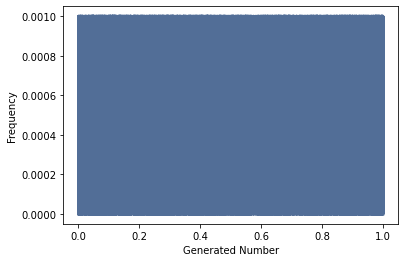

<Figure size 576x432 with 0 Axes>

In [16]:
thinkplot.Pmf(nums_pmf)
thinkplot.Show(xlabel='Generated Number', ylabel='Frequency')

The PMF created using the randomly generated numbers is entirely smooth. This is due to the fact that each of the randomly generated numbers is unique from one another, meaning that they each occur with a 1/1000 frequency as demonstrated on the graph above.

**Plotting the CDF**

In [17]:
nums_cdf = thinkstats2.Cdf(nums["Numbers"])

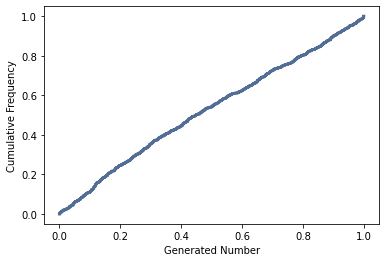

<Figure size 576x432 with 0 Axes>

In [18]:
thinkplot.Cdf(nums_cdf)
thinkplot.Show(xlabel='Generated Number', ylabel='Cumulative Frequency')

The CDF graph strengthens our conclusion that the distribution is uniform. The CDF forms a straight line from (0,0) to (1,1) meaning that the random numbers were generated in a uniform way, equally distributed between 0 and 1, by the random function.